# 문서 분류

자연어 처리에서 분류(classification) 문제는 자주 대두되고 있다. 두가지 분류유형에 대해서 집중하는데 하나는 내용 기반 분류(Content-based classification), 다른 하나는 요청기반 분류(Request-based classification)으로 나눠진다. 내용기반 분류는 특정 주제 혹은 내용이 예를 들어 30%이상이면 특정 문서유형으로 분류되는 것인 반면, 요청기반 분류는 특정 정책이나 아이디어에 기반하여 분류되는 것이다.

<img src="fig/document_classification.png" alt="문서분류" width="100%" />

## 자동화된 텍스트 분류 작업 흐름

자동화된 텍스트 분류 시스템을 개발할 경우 텍스트 데이터를 훈련/시험 데이터셋으로 나누는 것부터 시작하여 텍스트 정제작업을 한 후에 텍스트 피처를 추출하고 다양한 분류 모형에 넣어 예측 모형을 개발한다. 그리고 나서 초모수(hyper parameter) 튜닝 작업을 거쳐 최종 텍스트 분류 모형을 제작한 후에 이를 배포하는 과정을 거쳐 실제 현업 업무에 적용시키게 된다.

1. 훈련/시험 텍스트 데이터 준비
1. 텍스트 정규화(Text normalization)
1. 피처 추출(Feature extraction)
1. 모형 훈련(Model training)
1. 모형 예측과 평가(Model prediction and evaluation)
1. 모형 배포(Model deployment)

<img src="fig/nlp-automated-text-classification.png" alt="자동화된 문서 분류" width="100%" />

## 참고 문헌

- Dipanjan Sarkar (2016), Text Analytics with Python: https://github.com/dipanjanS/text-analytics-with-python
- Dipanjan Sarkar (2019), Text Analytics with Python,2nd Edition: https://github.com/Apress/text-analytics-w-python-2e

# 예측모형 시운전

위스콘신 Breast Cancer 데이터셋을 가져와서 예측모형을 개발해 보자.

##  유방암 분류 데이터셋

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

%matplotlib inline

# load data
data = load_breast_cancer()
X = data.data
y = data.target
print(X.shape, data.feature_names)

(569, 30) ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## 분류모형 평가 측도

In [2]:
## 훈련/시험 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(398, 30) (171, 30)


## 예측모형 적합

In [4]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression()
logistic.fit(X_train,y_train)

c:\users\statkclee\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## 모형성능

### 혼동행렬(confusion matrix)

In [13]:
import sys
sys.path.insert(0, './code')
import model_evaluation_utils as meu

y_pred = logistic.predict(X_test)
meu.display_confusion_matrix(true_labels=y_test, predicted_labels=y_pred, classes=[0, 1])

          Predicted:     
                   0    1
Actual: 0         59    4
        1          2  106


### 예측모형 성능지표

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



### 모형성능 시각화

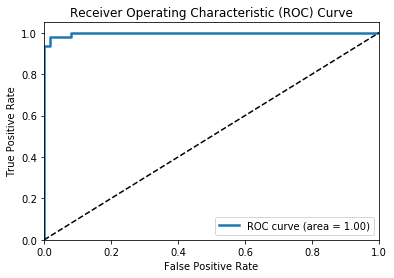

In [15]:
meu.plot_model_roc_curve(clf=logistic, features=X_test, true_labels=y_test)